Valores nulos por columna:
fecha                      0
titulo                     0
ventas_boletos             0
calificacion               0
eventos_promocionales      0
participacion_promocion    0
dtype: int64


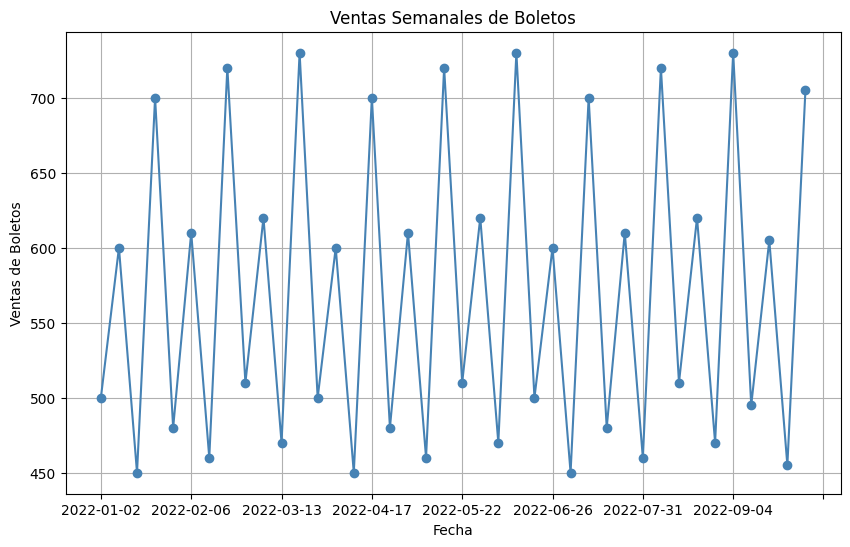

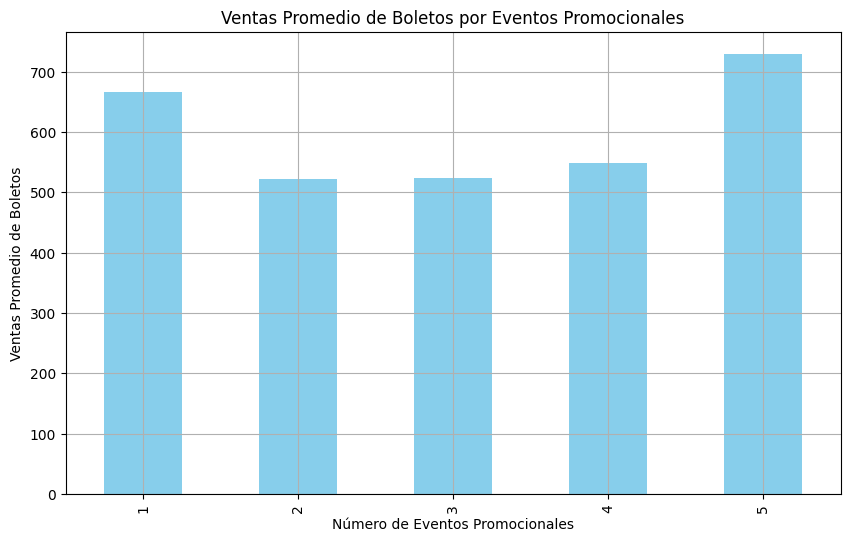

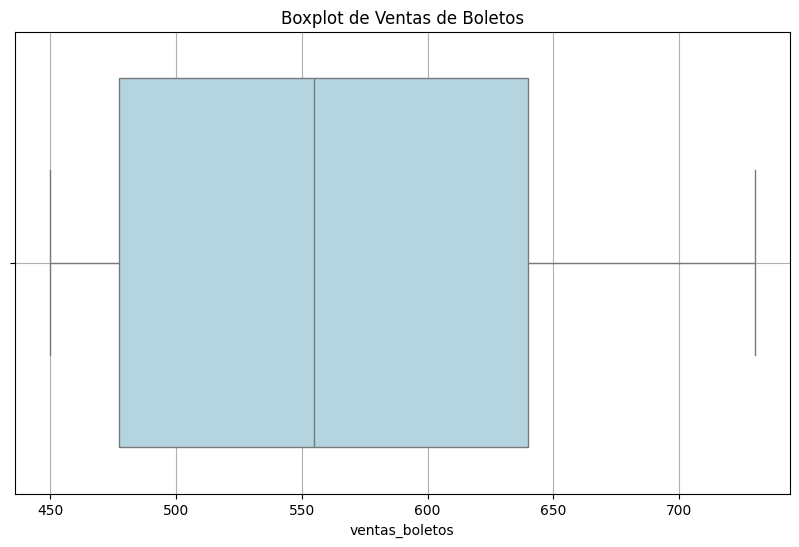


Matriz de correlación de Pearson:
                         ventas_boletos  calificacion  eventos_promocionales  \
ventas_boletos                 1.000000      0.891084              -0.024186   
calificacion                   0.891084      1.000000              -0.112398   
eventos_promocionales         -0.024186     -0.112398               1.000000   
participacion_promocion       -0.222780     -0.254830               0.829671   

                         participacion_promocion  
ventas_boletos                         -0.222780  
calificacion                           -0.254830  
eventos_promocionales                   0.829671  
participacion_promocion                 1.000000  


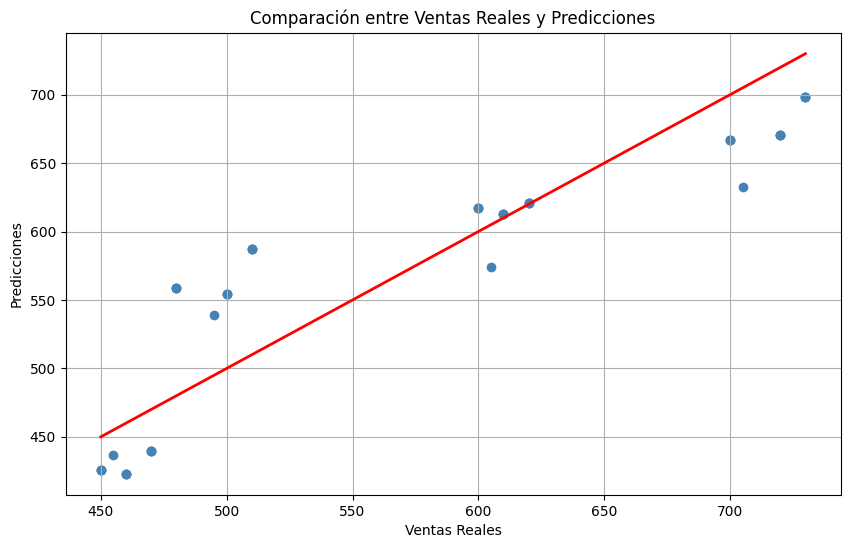

                            OLS Regression Results                            
Dep. Variable:         ventas_boletos   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     51.63
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           4.03e-13
Time:                        21:03:16   Log-Likelihood:                -207.98
No. Observations:                  40   AIC:                             424.0
Df Residuals:                      36   BIC:                             430.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [12]:
# 1. Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 2. Cargar los datos (Lectura y procesamiento de datos - Pandas)
ventas_df = pd.read_csv('ventas_peliculas.csv')
promocion_df = pd.read_csv('promocion_peliculas.csv')

# 3. Combinación de los DataFrames
df_combinado = pd.merge(ventas_df, promocion_df, on=['fecha', 'titulo'], how='left', validate="1:m")
# Rellenar valores nulos
df_combinado.fillna(0, inplace=True)

# 4. Exploración de datos y detección de valores nulos
print("Valores nulos por columna:")
print(df_combinado.isna().sum())

# 5. Visualización de las variables
# Gráfico de líneas de las ventas de boletos semanales
plt.figure(figsize=(10, 6))
df_combinado.groupby('fecha')['ventas_boletos'].sum().plot(kind='line', marker='o', color='steelblue')
plt.title('Ventas Semanales de Boletos')
plt.xlabel('Fecha')
plt.ylabel('Ventas de Boletos')
plt.grid(True)
plt.show()

# Gráfico de barras de ventas promedio con y sin eventos promocionales
plt.figure(figsize=(10, 6))
promocion_media = df_combinado.groupby('eventos_promocionales')['ventas_boletos'].mean()
promocion_media.plot(kind='bar', color='skyblue')
plt.title('Ventas Promedio de Boletos por Eventos Promocionales')
plt.xlabel('Número de Eventos Promocionales')
plt.ylabel('Ventas Promedio de Boletos')
plt.grid(True)
plt.show()

# 6. Detección y tratamiento de outliers
# Box plot para detectar outliers en las ventas de boletos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combinado, x='ventas_boletos', color='lightblue')
plt.title('Boxplot de Ventas de Boletos')
plt.grid(True)
plt.show()

# 7. Análisis de correlación
correlation_matrix = df_combinado[['ventas_boletos', 'calificacion', 'eventos_promocionales', 'participacion_promocion']].corr()
print("\nMatriz de correlación de Pearson:")
print(correlation_matrix)

# 8. Modelo de regresión lineal utilizando statsmodels
# Definir las variables independientes (calificacion, eventos_promocionales, participacion_promocion)
X = df_combinado[['calificacion', 'eventos_promocionales', 'participacion_promocion']]
X = sm.add_constant(X)  # Añadir una constante (intercepto) al modelo

# Definir la variable dependiente (ventas_boletos)
y = df_combinado['ventas_boletos']

# Entrenar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# 9. Visualización y evaluación del modelo
# Predicciones del modelo
df_combinado['predicciones'] = modelo.predict(X)

# Gráfico de comparación entre ventas reales y predicciones
plt.figure(figsize=(10, 6))
plt.scatter(df_combinado['ventas_boletos'], df_combinado['predicciones'], color='steelblue')
plt.plot([df_combinado['ventas_boletos'].min(), df_combinado['ventas_boletos'].max()],
         [df_combinado['ventas_boletos'].min(), df_combinado['ventas_boletos'].max()], 
         color='red', linewidth=2)
plt.title('Comparación entre Ventas Reales y Predicciones')
plt.xlabel('Ventas Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

# 10. Solicitar el resumen del modelo
print(modelo.summary())
